## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## Importing data

In [4]:
data=pd.read_csv("weather_classification_data.csv")
print(data.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


## Basic Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


## Data Cleaning

## Empty cells

In [6]:
data.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

### Check Duplicates

In [7]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


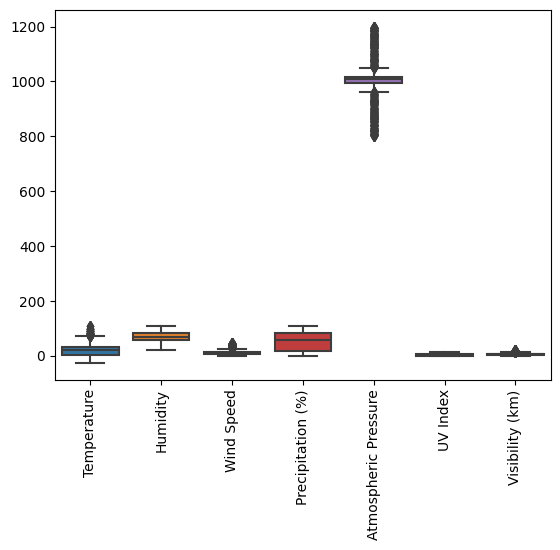

In [8]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [9]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0        73         9.5               82.0            3   
1         39.0        96         8.5               71.0            3   
2         30.0        64         7.0               16.0            0   
3         38.0        83         1.5               82.0            0   
4         27.0        74        17.0               66.0            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2       3              3.5         1   
1               1011.43         7       1             10.0         1   
2               1018.72         5       1              5.5         2   
3               1026.25         7       1              1.0         0   
4                990.67         1       3              2.5         2   

   Weather Type  
0             1  
1             0  
2             3  
3             3  
4             1  


## Extract Dependent and Independent Variables

In [10]:
X = encoded_data.iloc[:,0:11]   #Independent variable
y = encoded_data['Weather Type']     #dependent variable

## ## Statistical Analysis
### (Correlation,Describe)

In [11]:
print(data.describe())

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%

                      Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature                 1.000    -0.208      -0.070             -0.287   
Humidity                   -0.208     1.000       0.406              0.639   
Wind Speed                 -0.070     0.406       1.000              0.444   
Precipitation (%)          -0.287     0.639       0.444              1.000   
Cloud Cover                -0.225     0.277       0.184              0.267   
Atmospheric Pressure        0.209    -0.121      -0.078             -0.177   
UV Index                    0.375    -0.343      -0.068             -0.292   
Season                     -0.378     0.189       0.059              0.210   
Visibility (km)             0.251    -0.480      -0.312             -0.457   
Location                   -0.196     0.080       0.014              0.092   
Weather Type                0.029    -0.251      -0.166             -0.162   

                      Cloud Cover  Atmospheric Pressure  UV Ind

<Axes: >

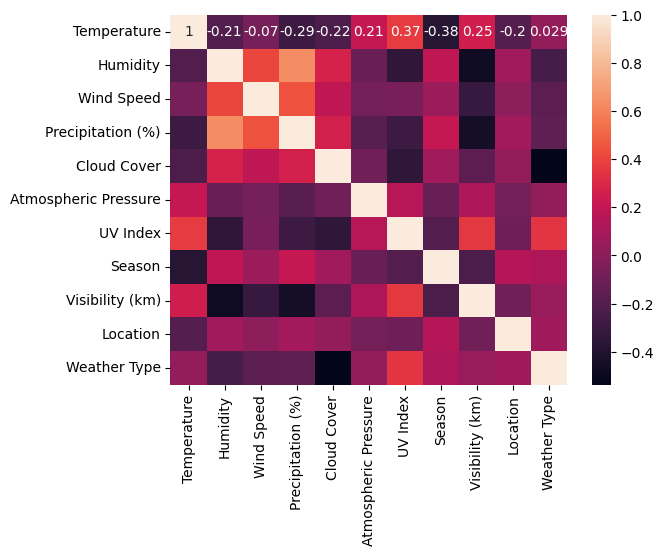

In [12]:
correlation=encoded_data.corr(numeric_only=True)
print(np.around(correlation,decimals=3))
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [14]:
# Fitting the MLR model to the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set result
y_pred = model.predict(X_test)
y_pred=np.around(y_pred)
# To compare the actual output values for X_test with the predicted value
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)

       Actual  Predicted
4111        3        3.0
10607       3        3.0
7372        3        3.0
11786       2        2.0
12227       3        3.0
...       ...        ...
2543        1        1.0
96          1        1.0
2474        2        2.0
2522        2        2.0
3393        0       -0.0

[2640 rows x 2 columns]


In [15]:
# predicting the accuracy score
score = r2_score(y_test,y_pred)
print("r2 score is ", score*100,"%")

r2 score is  100.0 %
